In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
auto = pd.read_csv('auto_mpg.csv')
print(auto.head())

    mpg  cylinder  displacement horse power  weight  acceleration  model year  \
0  18.0         8         307.0         130    3504          12.0          70   
1  15.0         8         350.0         165    3693          11.5          70   
2  18.0         8         318.0         150    3436          11.0          70   
3  16.0         8         304.0         150    3433          12.0          70   
4  17.0         8         302.0         140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [3]:
print(auto.shape)

(398, 9)


In [4]:
auto.head()

,mpg,cylinder,displacement,horse power,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
# creating two separate series from displacement and mpg columns 

auto_disp = auto['displacement'].astype(float)
auto_mpg = auto['mpg'].astype(float)

In [6]:
print(type(auto_disp))

<class 'pandas.core.series.Series'>


In [7]:
print(auto_disp.head())

0    307.0
1    350.0
2    318.0
3    304.0
4    302.0
Name: displacement, dtype: float64


In [8]:
print(auto_mpg.head())

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


In [9]:
# list comprehension example

x = [10, 15]
square_x = [i*i for i in x] 
print(square_x)

[100, 225]


In [10]:
# rescaling the values in auto_disp and auto_mpg series so that they are small numbers.

# lambda function variables or values to the left of : are inputs and values on the right of the : are output

auto_disp = auto_disp.apply(lambda x: x/100)
print("-----Displacement Stats-----" )
print(auto_disp.describe())


auto_mpg = auto_mpg.apply(lambda x: x/100)
print("-----Mileage Stats-----" )
print(auto_mpg.describe())

-----Displacement Stats-----
count    398.000000
mean       1.934259
std        1.042698
min        0.680000
25%        1.042500
50%        1.485000
75%        2.620000
max        4.550000
Name: displacement, dtype: float64
-----Mileage Stats-----
count    398.000000
mean       0.235146
std        0.078160
min        0.090000
25%        0.175000
50%        0.230000
75%        0.290000
max        0.466000
Name: mpg, dtype: float64


In [11]:
print(auto_disp.head())

0    3.07
1    3.50
2    3.18
3    3.04
4    3.02
Name: displacement, dtype: float64


In [12]:
print(auto_mpg.head())

0    0.18
1    0.15
2    0.18
3    0.16
4    0.17
Name: mpg, dtype: float64


What is correlation? 

Correlation describes the relationship between two variables. 

Correlation coefficient is a value that describes the strenght of the 
relationship betweent two variables. 

Correlation graph

<img src="correlation_graph.png" width=400, height=300>

Correlation coefficient formula

<img src="correlation_formula.png" width=400, height=300>

Values of $r$ range from -1 to 1, -1 represents inverse or negative correlation, 1 represents direct or positive correlation. 

Reference - https://www.wallstreetmojo.com/correlation-coefficient-formula/

Which features to select?

Choose features that are not correlated. 

In [13]:
# library
import seaborn as sns
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(auto)
plt.show()

corr = auto.corr()
corr.style.background_gradient(cmap='coolwarm')

<Figure size 1750x1750 with 56 Axes>

,mpg,cylinder,displacement,weight,acceleration,model year,origin
mpg,1,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.56345
cylinder,-0.775396,1,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1,0.180662
origin,0.56345,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1


#### Explanation

Possible independent variables : cylinder, displacement, weight, acceleration

Using the correlation table we can say that: 

displacement and weight are positively correlated

cylinder and weight are positively correlated

Now if we have to pick independent variables: acceleration, cylinder, displacement  

Dependent variable is mpg 

In [14]:
# creating an instance of LinearRegression class
reg = linear_model.LinearRegression()
print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


#### Explanation

x = auto_disp

y = auto_mpg

Goal: get a linear relationship between y and x.

How many rows are there? 398

The data is split so that we can use majority for training the model. Once the model is trained, we use the remaining data that was not used to test the model. 

y = y_known

using the model we can y_predict.


train_test_split() will return 4 things: x_train, x_test, y_train, y_test


x_1  y_1

x_2  y_2

x_3  y_3

x_4  y_4

x_5  y_5


x_train = [x_1, x_2,x_3,x_4]
y_train = [y_1,y_2,y_3,y_4]

x_test = [x_5]
y_test = [y_5] 

In [15]:
# using train_test_split(), we are splitting the data into training and test 

x_train, x_test, y_train, y_test = train_test_split(auto_disp, auto_mpg, test_size=0.2, random_state=4)

In [16]:
print(y_train.shape) 
y_train = y_train[:,None]
print(y_train.shape)
x_train = x_train[:,None]
print(x_train.shape)
x_test = x_test[:,None]
y_test = y_test[:,None]

(318,)
(318, 1)
(318, 1)


In [17]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
# we have to fit the data
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# y = mx + b here m is the coefficient (or slope) of x and b is the intercept

print(reg.coef_) # 
print(reg.intercept_)

[[-0.05885609]]
[0.34875617]


In [20]:
# auto_mpg = -0.05885609 auto_disp + 0.34875617

#### Metrics for Linear Regression

Mean Squared Error 

For linear regresion with one variable, $ y = mx +b  = wx + b$

$ MSE = \frac{1}{N} \sum_{i=1}^{n} (y_i - (mx_i + b))^2 $ 

$y_i$ is the actual value and $mx_i + b$ is the predicted value.

$N$ is the number of observations.

The loss function based on the MSE is 

$ L(m, b) = \frac{1}{N} \sum_{i=1}^{n} (y_i - (mx_i + b))^2 $ 

our goal is to minimize $L$ with respect to $m$ and $b$

The gradient of $L$

$L'(m, b) = \begin{bmatrix} \frac{dL}{dm} \\ \frac{dL}{db} \end{bmatrix} = \begin{bmatrix} \frac{1}{N} \sum -x_i.2(y_i - (mx_i + b))  \\ \frac{1}{N} \sum -2(y_i - (mx_i + b))  \end{bmatrix}$ 

Update equation of m and b with learning rate $\epsilon$ is

$ m = m - \epsilon \frac{dL}{dm} $

$ b = b - \epsilon \frac{dL}{db} $

<img src="linear_loss.png" width=400, height=300>

#### Different Gradient Descents

Gradient Descsent - every single data point is considered for update. 

Batch Gradient Descent - A whole batch of data is considered and then an update is done. 
It is slow when the training data is large. 

Stochastic Gradient Descent - a single point at random is chosen and loss is computed for update. 

Mini-batch Stochastic Gradient Descent - a mini-batch of randomly selected data points is considered and the average loss of the mini-batch is computed for the update. 

In [21]:
# yhat stands for perdicted value of y and for this we have to use the x_test values

yhat = reg.predict(x_test)

In [22]:
print(yhat[0])

[0.29872849]


In [23]:
print(yhat[0:5])
print("+++++++++++++++")
print(y_test[0:5])

[[0.29872849]
 [0.08154952]
 [0.27695174]
 [0.29637425]
 [0.20161594]]
+++++++++++++++
[[0.318]
 [0.14 ]
 [0.21 ]
 [0.381]
 [0.18 ]]


In [24]:
# mean squared error

np.mean((yhat-y_test)**2)

0.001895348309558066

In [25]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, yhat)
print(mse)

0.001895348309558066


In [26]:
# this is to makse sense of the mse value. 
print(y_test[0])
print(np.mean(y_test))
print(mse/np.mean(y_test)) 
print(mse/(np.mean(y_test)**2)) 

[0.318]
0.2339
0.00810324202461764
0.034644044568694486


Text(0, 0.5, 'MPG')

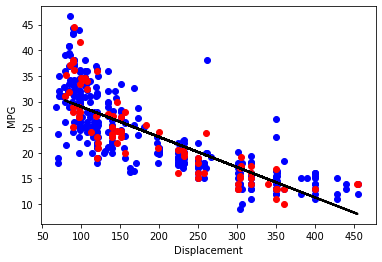

In [27]:
# Plot generated by Sean

scalingFactor = 100
plt.scatter(x_train*scalingFactor, y_train*scalingFactor,  color='blue')
plt.scatter(x_test*scalingFactor, y_test*scalingFactor,  color='red')
plt.plot(x_test*scalingFactor, yhat*scalingFactor, color='black', linewidth=2)
plt.xlabel("Displacement")
plt.ylabel("MPG")

In [28]:
"""
In-class activity: Can you explain in 100 words how linear regression is done if we have x (independent variable) and 
y (dependent variable?
"""

'\nIn-class activity: Can you explain in 100 words how linear regression is done if we have x (independent variable) and \ny (dependent variable?\n'

In [29]:
"""
In-class activity: In the auto-mpg example, find the relationship between 
weight and mpg. Find the mean squared error. 
"""


auto_weight = auto['weight'].astype(float)
auto_weight = auto_weight.apply(lambda x: x/100)
x_train, x_test, y_train, y_test = train_test_split(auto_weight, \
                                                    auto_mpg, \
                                                    test_size=0.2, \
                                                    random_state=4)

"""
y_train = y_train[:,None]
x_train = x_train[:,None]
x_test = x_test[:,None]
y_test = y_test[:,None]
"""

# Since [:, None] will not be supported, I first converted Pandas Data Series to numpy arrays
y_train = np.array(y_train)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# then I am reshapring the numpy arrays 
y_train = y_train.reshape(-1,1)
x_train = x_train.reshape(-1,1)
print(y_train.shape)
print(x_train.shape)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)


reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
yhat = reg.predict(x_test)
print('mse is ', mean_squared_error(y_test, yhat))

(318, 1)
(318, 1)
[[-0.00753497]]
[0.45896016]
mse is  0.001902114703461823


Text(0, 0.5, 'MPG')

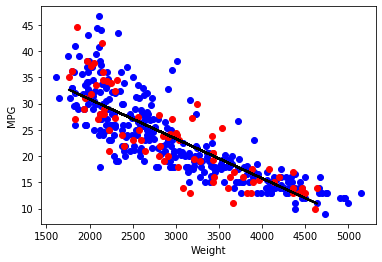

In [30]:
# plot of auto_weight and quto_mpg

scalingFactor = 100
plt.scatter(x_train*scalingFactor, y_train*scalingFactor,  color='blue')
plt.scatter(x_test*scalingFactor, y_test*scalingFactor,  color='red')
plt.plot(x_test*scalingFactor, yhat*scalingFactor, color='black', linewidth=2)
plt.xlabel("Weight")
plt.ylabel("MPG")

Multilinear Regression - In a multilinear regression, instead of one independent variable, we will consider more than one independent variable to find a linear relationship between independent variables and dependent variable. In the below example, we will consider two features, displacement and weight as inputs for our model and our target will still be mpg. 

In [31]:
auto_weight = auto['weight'].astype(float)

In [32]:
x = np.array([[2, 3, 5], [7, 8, 9]])
print(x.shape)
print(x)

(2, 3)
[[2 3 5]
 [7 8 9]]


In [33]:
# transpose means rows become columns and columns become rows

xtt = x.T
print(xtt)
print(xtt.shape)

[[2 7]
 [3 8]
 [5 9]]
(3, 2)


In [34]:
# if we want to perform array (or matrix) multiplication of x and xtt
# columns in x should match the rows in xtt
multxxtt = np.dot(x, xtt)
print(multxxtt)

[[ 38  83]
 [ 83 194]]


In [35]:
a = np.array([[2, 3, 5], [7, 8, 9]])
print(a.shape)
print(a)

b = np.array([10, 20])
print(b.shape)
print(b)

(2, 3)
[[2 3 5]
 [7 8 9]]
(2,)
[10 20]


In [36]:
multab = np.dot(a, b)
print(multab)

ValueError: shapes (2,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

In [37]:
# np.array([x1, x2]).T , here T stands for transpose

x = np.array([auto_disp, auto_weight]).T
print(x.ndim)
print(x.shape)
y = np.array([auto_mpg]).T
print(y.ndim)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, \
                                                    y, \
                                                    test_size=0.2, \
                                                    random_state=4)

2
(398, 2)
2
(398, 1)


In [38]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print(reg.coef_)
print(reg.intercept_)
print(reg.score(x_train, y_train)) # this returns R^2, R^2 lies [0, 1] (this is an interval notation)
print(reg.score(x_test, y_test))

[[-8.70028582e-03 -6.53171474e-05]]
[0.44594961]
0.6896873325460859
0.7211013490249394


In [40]:
# aut0_mpg = -0.0087*auto_disp -0.0000653*auto_weight + 0.44594961 

In [41]:
# for x_test, y_test is the actual value 
# we use x_test for reg.predict because we can only use the independent variables
# x_test, y_test, yhat
# mse is the squared difference between the y_test an yhat

yhat = reg.predict(x_test)

In [42]:
mean_squared_error(y_test, yhat)

0.0017938384717537087

In [43]:
y_t_predict = reg.predict(x_train)
mean_squared_error(y_train, y_t_predict)

0.0018643672578107476

In [ ]:
# Explanation - we compare the mse from train and mse from test and we observe that the values 0.0018644 and 0.0017938
# are closer to each other. The linear regression equation is not a bad fit. 

# When will the equation be a bad fit?
# When the difference between mse of train and mse of test is over 5%. 

In [49]:
"""
In-class activity: In the auto-mpg example, find the relationship between 
horse power and weight with car mpg. Find the mean squared error. 
"""
print(auto["horse power"].describe())
print(auto["horse power"].unique())

count     398
unique     94
top       150
freq       22
Name: horse power, dtype: object
['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [51]:
# There is a "?" in the horse power column so astype("float") returns an error. First we are replacing "?" with 0.
auto["horse power"].replace("?", 0, inplace=True)

In [53]:
auto["horse power"] = auto["horse power"].astype("float")

In [54]:
print(auto["horse power"].mean())
print(auto["horse power"].median())

102.89447236180905
92.0


In [55]:
# choosing median to repalce 0 in the horse power column
auto["horse power"].replace(0, auto["horse power"].median(), inplace=True)

In [56]:
print(auto["horse power"].describe())

count    398.000000
mean     104.281407
std       38.229470
min       46.000000
25%       76.000000
50%       92.000000
75%      125.000000
max      230.000000
Name: horse power, dtype: float64


In [57]:
auto_hp = auto["horse power"]

In [58]:
# np.array([x1, x2]).T , here T stands for transpose

x = np.array([auto_hp, auto_weight]).T
print(x.ndim)
print(x.shape)
y = np.array([auto_mpg]).T
print(y.ndim)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, \
                                                    y, \
                                                    test_size=0.2, \
                                                    random_state=4)

2
(398, 2)
2
(398, 1)


In [61]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
print(reg.coef_)
print(reg.intercept_)

[[-3.89582383e-04 -6.01029495e-05]]
[0.45425445]


In [63]:
# mse for training data

y_t_predict = reg.predict(x_train)
mean_squared_error(y_train, y_t_predict)

0.0018254248487794378

In [64]:
yhat = reg.predict(x_test)

In [65]:
# mse for test data

mean_squared_error(y_test,yhat)

0.001727969508504626

In [68]:
# r-squared

from sklearn.metrics import r2_score

print("r-squared for the test data: ", r2_score(y_test, yhat))
    
print("r-squared for the train data: ", r2_score(y_train, y_t_predict))

r-squared for the test data:  0.73134238537273
r-squared for the train data:  0.696169061278963


In [54]:
# example of study time versus score

x = np.array([16, 34, 8, 38, 39, 40, 54, 21, 16, 67, 40, 43, 47, 56, 60, 80])
y = np.array([50, 61, 45, 60, 60, 67, 65, 59, 57, 73, 68, 71, 75, 71, 88, 94])

In [55]:
print(y.shape) 
y = y.reshape(-1,1) # -1 is used to access last values in a list or a tuple
print(y.shape)
x = x.reshape(-1,1)
print(x.shape)

(16,)
(16, 1)
(16, 1)


In [56]:
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print(reg.coef_)
print(reg.intercept_)

[[0.57581085]]
[42.78379049]


In [ ]:
# linear regression calculator

# https://www.socscistatistics.com/tests/regression/default.aspx

Resources -
https://towardsdatascience.com/differential-equations-basics-c72db0a8c42a

Understandable Statistics: Concepts and Methods, Enhanced 11th Edition
by Charles Henry Brase (Author), Corrinne Pellillo Brase (Author)
